<a href="https://colab.research.google.com/github/nimamt/machine_learning/blob/master/Machine%20Learning/25-neural/NeuralProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## NOTE: Do not download the full zip from the link! We provide a special version of this file that has some extra feature engineering for you to do. You won't be able to follow along with the original file!

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

##Data Analysis

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [120]:
df = pd.read_csv('/content/drive/MyDrive/lending_club_loan_two.csv')

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [122]:
df['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


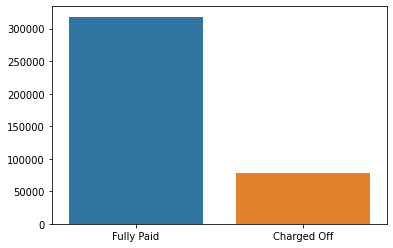

In [123]:
paid_or_not = df['loan_status'].value_counts()
sns.barplot(paid_or_not.index, paid_or_not.values)

# sns.countplot(x='loan_status', data=df)

In [124]:
df.groupby('loan_status').count()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
loan_status,,,,,,,,,,,,,,,,,,,,,
Charged Off,77673,77673,77673,77673,77673,77673,71730,72635,77673,77673,...,77673,77673,77673,77610,77673,77673,77673,72123,77586,77673
Fully Paid,318357,318357,318357,318357,318357,318357,301373,305094,318357,318357,...,318357,318357,318357,318144,318357,318357,318357,286112,317909,318357


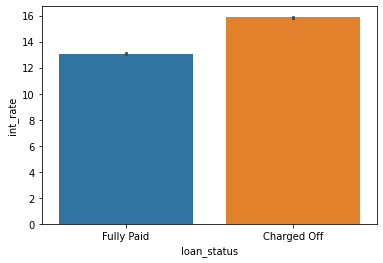

In [125]:
sns.barplot(x='loan_status',y='int_rate',data=df)

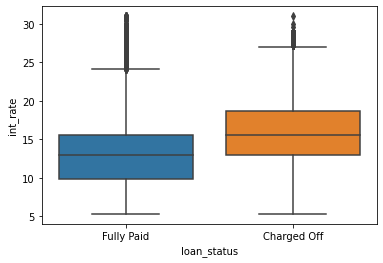

In [126]:
sns.boxplot(x='loan_status',y='int_rate',data=df)

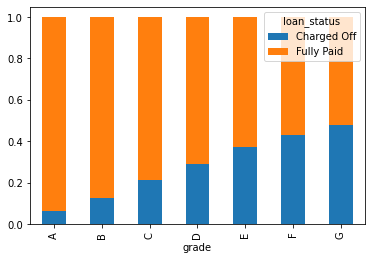

In [127]:
(pd.crosstab(df['grade'],df['loan_status'], 
             normalize='index')
   .plot.bar(stacked=True)
)

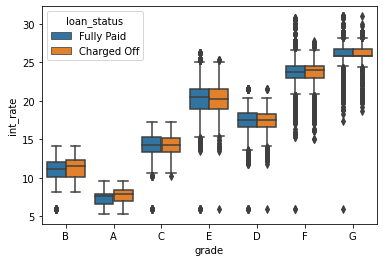

In [128]:
sns.boxplot(x='grade',y='int_rate',hue='loan_status', data=df)

In [129]:
df.groupby('grade').mean()['int_rate']

grade
A     7.392854
B    11.223131
C    14.317992
D    17.484528
E    20.283007
F    23.701144
G    25.904352
Name: int_rate, dtype: float64

In [130]:
pd.crosstab(df['grade'],df['loan_status'], 
             normalize='index')['Fully Paid']

grade
A    0.937121
B    0.874270
C    0.788191
D    0.711322
E    0.626366
F    0.572120
G    0.521611
Name: Fully Paid, dtype: float64

In [131]:
pd.crosstab(df['grade'],df['loan_status'], 
             normalize='index')['Fully Paid'] * df.groupby('grade').mean()['int_rate']

grade
A     6.928000
B     9.812041
C    11.285313
D    12.437125
E    12.704578
F    13.559905
G    13.511995
dtype: float64

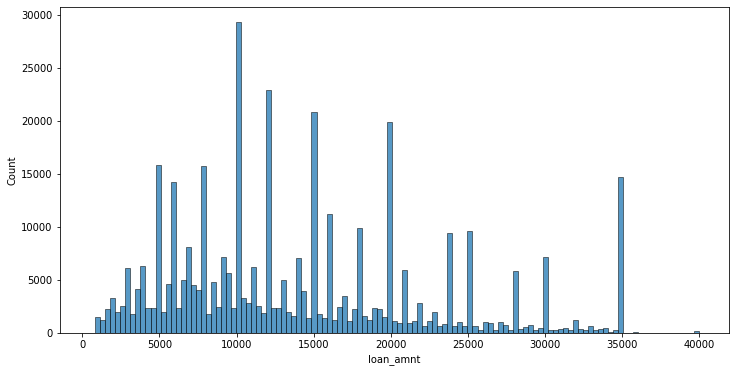

In [132]:
plt.figure(figsize=(12,6))
sns.histplot(x='loan_amnt', data=df)

In [133]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


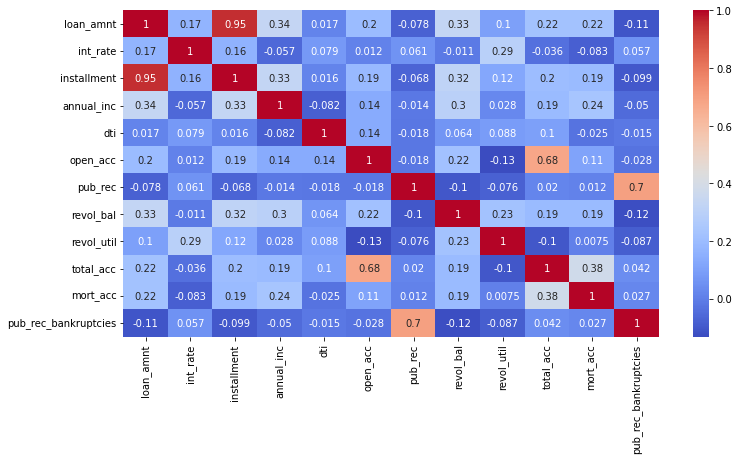

In [134]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

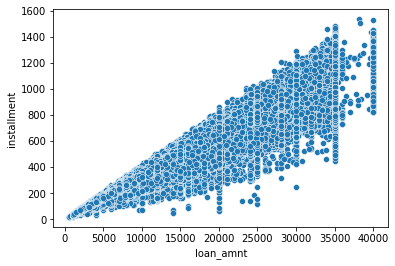

In [135]:
sns.scatterplot(x='loan_amnt', y='installment', data=df)

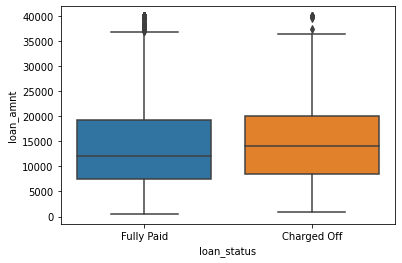

In [136]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [137]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [138]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [139]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

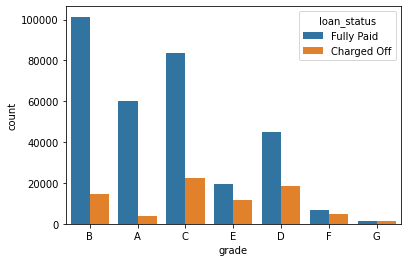

In [140]:
sns.countplot(x='grade', hue='loan_status', data=df)

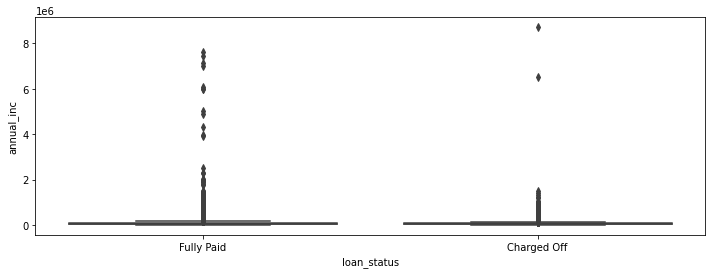

In [141]:
plt.figure(figsize=(12,4))
sns.boxplot(x='loan_status',y='annual_inc', data=df)

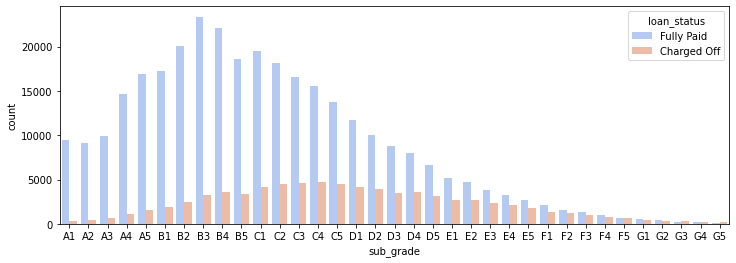

In [23]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', data=df, order=subgrade_order, palette='coolwarm',
              hue='loan_status')

In [24]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [25]:
def transformation(x):
    if x == 'Fully Paid':
        return 1
    elif x == 'Charged Off':
        return 0

new_col = df['loan_status'].apply(transformation)
df['loan_repaid'] = new_col
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


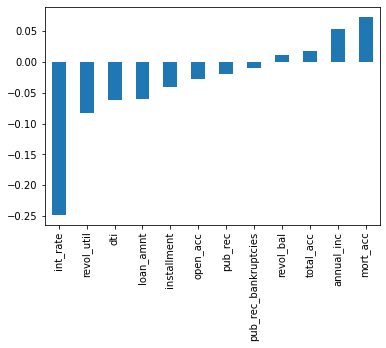

In [26]:
#CODE HERE
s = df.corr().sort_values(by='loan_repaid')[:-1]['loan_repaid'].plot(kind='bar')

In [27]:
len(df)

396030

In [28]:
396030-df.count()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [29]:
(396030-df.count()) / 396030 * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [30]:
df = df.drop('emp_title', axis=1)

In [31]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [32]:
emp_length_order = [
 '< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years'
 ]

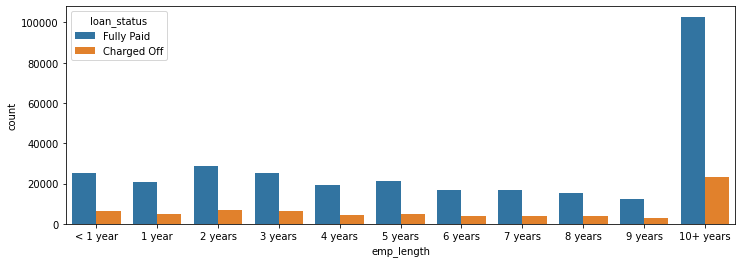

In [33]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length', data=df, order=emp_length_order, 
              hue='loan_status')

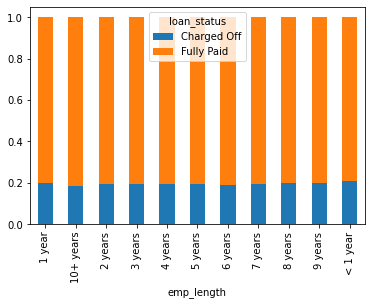

In [34]:
pd.crosstab(df['emp_length'],df['loan_status'], 
             normalize='index').plot.bar(stacked=True)

In [35]:
df = df.drop('emp_length', axis=1)

## Deal with missing data

In [36]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [37]:
df = df.drop('title', axis=1)

In [38]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [39]:
df.corr()['mort_acc'].sort_values(ascending=False)[1:]

total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
loan_repaid             0.073111
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64

In [40]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [41]:
def fill_mort_acc(total_acc, mort_acc):
  if np.isnan(mort_acc):
    return total_acc_avg[total_acc]
  else:
    return mort_acc

In [42]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [43]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [44]:
df = df.dropna()

In [45]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [46]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [47]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [48]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [49]:
df = df.drop('grade', axis=1)

In [50]:
dummies = pd.get_dummies(df['sub_grade'], drop_first=True)

df = pd.concat([df.drop('sub_grade', axis=1), dummies], axis=1)

In [51]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [52]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']], drop_first=True)

df = pd.concat([df.drop(['verification_status', 'application_type','initial_list_status','purpose'], axis=1), dummies], axis=1)

In [53]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [54]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [55]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [56]:
dummies = pd.get_dummies(df['home_ownership'], drop_first=True)

df = pd.concat([df.drop('home_ownership', axis=1), dummies], axis=1)

In [57]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [58]:
df['zip_code'] = df['address'].apply(lambda address: address[-5:])

In [59]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [60]:
dummies = pd.get_dummies(df['zip_code'], drop_first=True)

df = pd.concat([df.drop('zip_code', axis=1), dummies], axis=1)

In [61]:
df = df.drop('address', axis=1)

In [62]:
df = df.drop('issue_d', axis=1)

In [63]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [64]:
df['earliest_cr_line']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 395219, dtype: int64

In [65]:
df['earliest_cr_line'].value_counts()

2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1944        1
1948        1
Name: earliest_cr_line, Length: 65, dtype: int64

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
df = df.drop('loan_status', axis=1)

In [68]:
X = df.drop('loan_repaid', axis=1).values

In [69]:
y = df['loan_repaid'].values

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=101)

In [71]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
scaler = MinMaxScaler()

In [73]:
X_train = scaler.fit_transform(X_train)

In [74]:
X_test = scaler.transform(X_test)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

loan_amnt                       0
verification_status_Verified    0
purpose_home_improvement        0
purpose_educational             0
purpose_debt_consolidation      0
                               ..
C2                              0
C1                              0
B5                              0
B4                              0
93700                           0
Length: 79, dtype: int64

## Models

### Model 1

In [75]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
X_train.shape

(316175, 78)

In [ ]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(x=X_train, y=y_train, epochs=25, batch_size=256,
          validation_data=(X_test,y_test))

Epoch 1/25
1236/1236 [==============================] - 7s 5ms/step - loss: 0.3006 - val_loss: 0.2658
Epoch 2/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2654 - val_loss: 0.2634
Epoch 3/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2625 - val_loss: 0.2625
Epoch 4/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2617 - val_loss: 0.2626
Epoch 5/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2609 - val_loss: 0.2621
Epoch 6/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2604 - val_loss: 0.2621
Epoch 7/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2603 - val_loss: 0.2615
Epoch 8/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2596 - val_loss: 0.2618
Epoch 9/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2591 - val_loss: 0.2613
Epoch 10/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.258

In [ ]:
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,0.300589,0.265850
1,0.265407,0.263433
2,0.262483,0.262482
3,0.261682,0.262594
4,0.260884,0.262087
5,0.260414,0.262106
6,0.260318,0.261523
7,0.259618,0.261778
8,0.259086,0.261278
9,0.258920,0.261832


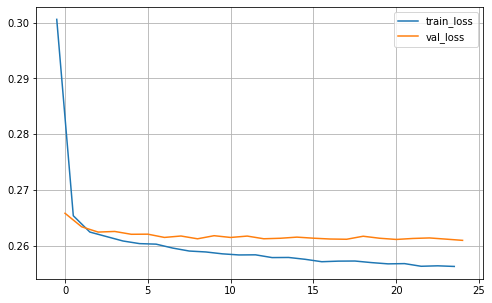

In [ ]:
plt.figure(figsize=(8,5))
epochs = np.arange(0, len(losses["loss"]))
plt.plot(epochs - 0.5, losses["loss"], label="train_loss")
plt.plot(epochs, losses["val_loss"], label="val_loss")
plt.legend()
plt.grid(True)
# plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [ ]:
df['loan_repaid'].value_counts()

1    317696
0     77523
Name: loan_repaid, dtype: int64

In [ ]:
df['loan_repaid'].value_counts() / len(df)

1    0.803848
0    0.196152
Name: loan_repaid, dtype: float64

In [ ]:
confusion_matrix(y_test, predictions)

array([[ 6945,  8713],
       [  164, 63222]])

### Model 2

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',
                           mode='min', verbose=1, patience= 10)

In [ ]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(60, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(60, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(x=X_train, y=y_train, epochs=50, batch_size=256,
          validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/50
1236/1236 [==============================] - 10s 7ms/step - loss: 0.2897 - val_loss: 0.2648
Epoch 2/50
1236/1236 [==============================] - 7s 5ms/step - loss: 0.2633 - val_loss: 0.2636
Epoch 3/50
1236/1236 [==============================] - 7s 5ms/step - loss: 0.2616 - val_loss: 0.2632
Epoch 4/50
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2608 - val_loss: 0.2617
Epoch 5/50
1236/1236 [==============================] - 8s 6ms/step - loss: 0.2603 - val_loss: 0.2624
Epoch 6/50
1236/1236 [==============================] - 7s 5ms/step - loss: 0.2596 - val_loss: 0.2614
Epoch 7/50
1236/1236 [==============================] - 7s 5ms/step - loss: 0.2596 - val_loss: 0.2614
Epoch 8/50
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2592 - val_loss: 0.2611
Epoch 9/50
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2587 - val_loss: 0.2610
Epoch 10/50
1236/1236 [==============================] - 7s 6ms/step - loss: 0.25

In [ ]:
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,0.289660,0.264819
1,0.263304,0.263552
2,0.261616,0.263195
3,0.260848,0.261661
4,0.260350,0.262353
5,0.259555,0.261406
6,0.259598,0.261415
7,0.259173,0.261138
8,0.258681,0.260973
9,0.258247,0.261145


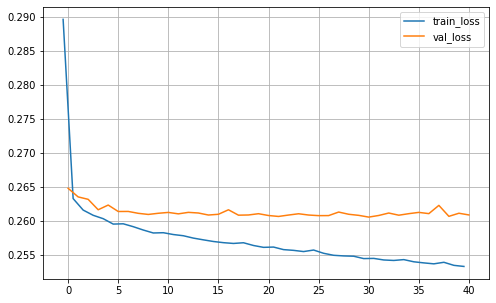

In [ ]:
plt.figure(figsize=(8,5))
epochs = np.arange(0, len(losses["loss"]))
plt.plot(epochs - 0.5, losses["loss"], label="train_loss")
plt.plot(epochs, losses["val_loss"], label="val_loss")
plt.legend()
plt.grid(True)
# plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.45      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



### Model 3

In [ ]:
from tensorflow import keras

In [ ]:
X_train.shape[1:]

(78,)

In [ ]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(60, activation="relu")(input_)
hidden2 = keras.layers.Dense(60, activation="relu")(hidden1)
hidden3 = keras.layers.Dense(60, activation="relu")(hidden2)
hidden4 = keras.layers.Dense(60, activation="relu")(hidden3)
concat = keras.layers.Concatenate()([input_, hidden4])
output = keras.layers.Dense(units=1, activation='sigmoid')(concat)
model = keras.Model(inputs=[input_], outputs=[output])

model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',
                           mode='min', verbose=1, patience=20)

In [ ]:
model.fit(x=X_train, y=y_train, epochs=50, batch_size=256,
          validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/50
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2835 - val_loss: 0.2677
Epoch 2/50
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2624 - val_loss: 0.2637
Epoch 3/50
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2601 - val_loss: 0.2645
Epoch 4/50
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2591 - val_loss: 0.2626
Epoch 5/50
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2583 - val_loss: 0.2618
Epoch 6/50
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2578 - val_loss: 0.2622
Epoch 7/50
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2573 - val_loss: 0.2648
Epoch 8/50
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2571 - val_loss: 0.2622
Epoch 9/50
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2566 - val_loss: 0.2615
Epoch 10/50
1236/1236 [==============================] - 6s 5ms/step - loss: 0.256

In [ ]:
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,0.283463,0.267715
1,0.262369,0.263672
2,0.260113,0.264475
3,0.259069,0.262630
4,0.258276,0.261773
5,0.257830,0.262201
6,0.257319,0.264843
7,0.257055,0.262186
8,0.256594,0.261481
9,0.256156,0.261242


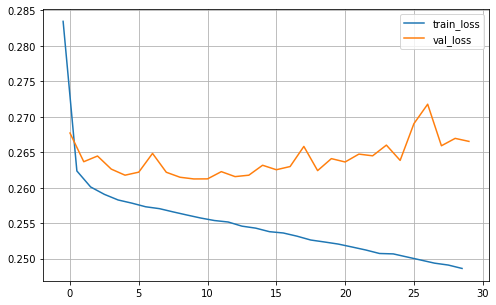

In [ ]:
plt.figure(figsize=(8,5))
epochs = np.arange(0, len(losses["loss"]))
plt.plot(epochs - 0.5, losses["loss"], label="train_loss")
plt.plot(epochs, losses["val_loss"], label="val_loss")
plt.legend()
plt.grid(True)
# plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.49      0.63     15658
           1       0.89      0.98      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.88      0.74      0.78     79044
weighted avg       0.88      0.89      0.87     79044



### Model 4

In [ ]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
dropout1 = Dropout(0.2)(input_)
hidden1 = keras.layers.Dense(39, activation="relu")(dropout1)
dropout2 = Dropout(0.2)(hidden1)
hidden2 = keras.layers.Dense(19, activation="relu")(dropout2)
dropout3 = Dropout(0.2)(hidden2)
concat = keras.layers.Concatenate()([dropout1, dropout3])
dropout4 = Dropout(0.2)(concat)
output = keras.layers.Dense(units=1, activation='sigmoid')(dropout4)
model = keras.Model(inputs=[input_], outputs=[output])

model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',
                           mode='min', verbose=1, patience= 10)

In [ ]:
model.fit(x=X_train, y=y_train, epochs=50, batch_size=256,
          validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/50
1236/1236 [==============================] - 10s 6ms/step - loss: 0.3560 - val_loss: 0.2815
Epoch 2/50
1236/1236 [==============================] - 6s 5ms/step - loss: 0.3255 - val_loss: 0.2824
Epoch 3/50
1236/1236 [==============================] - 6s 5ms/step - loss: 0.3214 - val_loss: 0.2806
Epoch 4/50
1236/1236 [==============================] - 6s 5ms/step - loss: 0.3211 - val_loss: 0.2808
Epoch 5/50
1236/1236 [==============================] - 6s 5ms/step - loss: 0.3198 - val_loss: 0.2801
Epoch 6/50
1236/1236 [==============================] - 6s 5ms/step - loss: 0.3195 - val_loss: 0.2799
Epoch 7/50
1236/1236 [==============================] - 6s 5ms/step - loss: 0.3192 - val_loss: 0.2786
Epoch 8/50
1236/1236 [==============================] - 6s 5ms/step - loss: 0.3196 - val_loss: 0.2789
Epoch 9/50
1236/1236 [==============================] - 6s 5ms/step - loss: 0.3191 - val_loss: 0.2778
Epoch 10/50
1236/1236 [==============================] - 6s 5ms/step - loss: 0.31

KeyboardInterrupt: ignored

In [ ]:
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,0.366508,0.281710
1,0.324751,0.281351
2,0.321343,0.279771
3,0.320174,0.280305
4,0.319516,0.279225
5,0.319088,0.278405
6,0.318807,0.280815
7,0.317760,0.277057
8,0.317405,0.279522
9,0.317704,0.278604


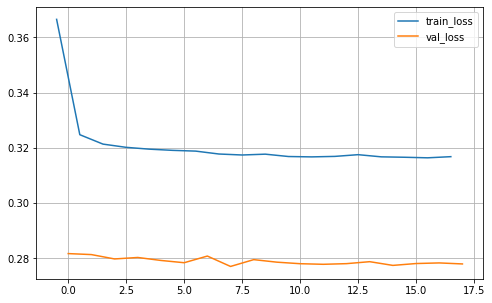

In [ ]:
plt.figure(figsize=(8,5))
epochs = np.arange(0, len(losses["loss"]))
plt.plot(epochs - 0.5, losses["loss"], label="train_loss")
plt.plot(epochs, losses["val_loss"], label="val_loss")
plt.legend()
plt.grid(True)
# plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



### Model 5

In [ ]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(5, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(x=X_train, y=y_train, epochs=25, batch_size=256,
          validation_data=(X_test,y_test))

Epoch 1/25
1236/1236 [==============================] - 9s 7ms/step - loss: 0.3723 - val_loss: 0.3162
Epoch 2/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.3243 - val_loss: 0.2655
Epoch 3/25
1236/1236 [==============================] - 7s 5ms/step - loss: 0.2926 - val_loss: 0.2671
Epoch 4/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2897 - val_loss: 0.2671
Epoch 5/25
1236/1236 [==============================] - 7s 5ms/step - loss: 0.2887 - val_loss: 0.2663
Epoch 6/25
1236/1236 [==============================] - 7s 5ms/step - loss: 0.2866 - val_loss: 0.2625
Epoch 7/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2855 - val_loss: 0.2632
Epoch 8/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2848 - val_loss: 0.2635
Epoch 9/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2843 - val_loss: 0.2642
Epoch 10/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.283

In [ ]:
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,0.372314,0.316247
1,0.324261,0.265475
2,0.292563,0.267096
3,0.289734,0.267068
4,0.288677,0.266275
5,0.286595,0.262534
6,0.285472,0.263155
7,0.284818,0.263516
8,0.284348,0.264247
9,0.283877,0.263667


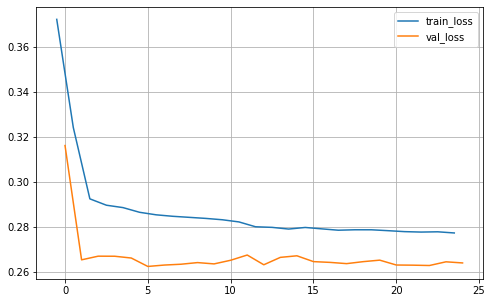

In [ ]:
plt.figure(figsize=(8,5))
epochs = np.arange(0, len(losses["loss"]))
plt.plot(epochs - 0.5, losses["loss"], label="train_loss")
plt.plot(epochs, losses["val_loss"], label="val_loss")
plt.legend()
plt.grid(True)
# plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [85]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.71      0.77     79044
weighted avg       0.90      0.89      0.87     79044



## Different Optimizers

In [76]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adadelta')

In [77]:
model.fit(x=X_train, y=y_train, epochs=25, batch_size=256,
          validation_data=(X_test,y_test))

Epoch 1/25
1236/1236 [==============================] - 12s 8ms/step - loss: 0.7004 - val_loss: 0.6914
Epoch 2/25
1236/1236 [==============================] - 10s 8ms/step - loss: 0.6755 - val_loss: 0.6623
Epoch 3/25
1236/1236 [==============================] - 8s 7ms/step - loss: 0.6457 - val_loss: 0.6283
Epoch 4/25
1236/1236 [==============================] - 9s 7ms/step - loss: 0.6136 - val_loss: 0.5942
Epoch 5/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.5831 - val_loss: 0.5639
Epoch 6/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.5579 - val_loss: 0.5399
Epoch 7/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.5387 - val_loss: 0.5225
Epoch 8/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.5249 - val_loss: 0.5104
Epoch 9/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.5166 - val_loss: 0.5022
Epoch 10/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.5

In [78]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adagrad')

In [79]:
model.fit(x=X_train, y=y_train, epochs=25, batch_size=256,
          validation_data=(X_test,y_test))

Epoch 1/25
1236/1236 [==============================] - 11s 8ms/step - loss: 0.5549 - val_loss: 0.4896
Epoch 2/25
1236/1236 [==============================] - 4s 4ms/step - loss: 0.4974 - val_loss: 0.4720
Epoch 3/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.4798 - val_loss: 0.4523
Epoch 4/25
1236/1236 [==============================] - 4s 4ms/step - loss: 0.4605 - val_loss: 0.4304
Epoch 5/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.4429 - val_loss: 0.4111
Epoch 6/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.4269 - val_loss: 0.3948
Epoch 7/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.4130 - val_loss: 0.3808
Epoch 8/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.4022 - val_loss: 0.3689
Epoch 9/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.3929 - val_loss: 0.3589
Epoch 10/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.38

In [80]:
model.fit(x=X_train, y=y_train, epochs=10, batch_size=256,
          validation_data=(X_test,y_test))

Epoch 1/10
1236/1236 [==============================] - 8s 7ms/step - loss: 0.3187 - val_loss: 0.2930
Epoch 2/10
1236/1236 [==============================] - 6s 5ms/step - loss: 0.3174 - val_loss: 0.2916
Epoch 3/10
1236/1236 [==============================] - 6s 5ms/step - loss: 0.3149 - val_loss: 0.2901
Epoch 4/10
1236/1236 [==============================] - 7s 6ms/step - loss: 0.3130 - val_loss: 0.2889
Epoch 5/10
1236/1236 [==============================] - 5s 4ms/step - loss: 0.3121 - val_loss: 0.2877
Epoch 6/10
1236/1236 [==============================] - 4s 4ms/step - loss: 0.3094 - val_loss: 0.2867
Epoch 7/10
1236/1236 [==============================] - 5s 4ms/step - loss: 0.3086 - val_loss: 0.2854
Epoch 8/10
1236/1236 [==============================] - 4s 4ms/step - loss: 0.3073 - val_loss: 0.2846
Epoch 9/10
1236/1236 [==============================] - 4s 4ms/step - loss: 0.3063 - val_loss: 0.2837
Epoch 10/10
1236/1236 [==============================] - 4s 3ms/step - loss: 0.304

In [81]:
model.fit(x=X_train, y=y_train, epochs=25, batch_size=256,
          validation_data=(X_test,y_test))

Epoch 1/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.3037 - val_loss: 0.2821
Epoch 2/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.3024 - val_loss: 0.2813
Epoch 3/25
1236/1236 [==============================] - 4s 4ms/step - loss: 0.3008 - val_loss: 0.2808
Epoch 4/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.3001 - val_loss: 0.2801
Epoch 5/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2991 - val_loss: 0.2795
Epoch 6/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2985 - val_loss: 0.2790
Epoch 7/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2970 - val_loss: 0.2784
Epoch 8/25
1236/1236 [==============================] - 4s 4ms/step - loss: 0.2959 - val_loss: 0.2779
Epoch 9/25
1236/1236 [==============================] - 4s 4ms/step - loss: 0.2960 - val_loss: 0.2775
Epoch 10/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.295

In [82]:
model.fit(x=X_train, y=y_train, epochs=25, batch_size=256,
          validation_data=(X_test,y_test))

Epoch 1/25
1236/1236 [==============================] - 8s 7ms/step - loss: 0.2866 - val_loss: 0.2724
Epoch 2/25
1236/1236 [==============================] - 6s 4ms/step - loss: 0.2858 - val_loss: 0.2722
Epoch 3/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2858 - val_loss: 0.2721
Epoch 4/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2853 - val_loss: 0.2719
Epoch 5/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2851 - val_loss: 0.2717
Epoch 6/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2850 - val_loss: 0.2716
Epoch 7/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2842 - val_loss: 0.2714
Epoch 8/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2839 - val_loss: 0.2712
Epoch 9/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2840 - val_loss: 0.2711
Epoch 10/25
1236/1236 [==============================] - 4s 4ms/step - loss: 0.283

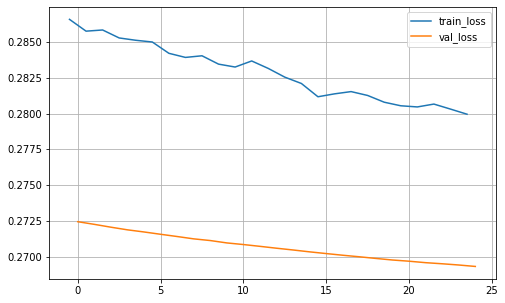

In [83]:
losses = pd.DataFrame(model.history.history)
plt.figure(figsize=(8,5))
epochs = np.arange(0, len(losses["loss"]))
plt.plot(epochs - 0.5, losses["loss"], label="train_loss")
plt.plot(epochs, losses["val_loss"], label="val_loss")
plt.legend()
plt.grid(True)
# plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [87]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [88]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [89]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adamax')

In [90]:
model.fit(x=X_train, y=y_train, epochs=25, batch_size=256,
          validation_data=(X_test,y_test))

Epoch 1/25
1236/1236 [==============================] - 8s 6ms/step - loss: 0.3466 - val_loss: 0.2730
Epoch 2/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2763 - val_loss: 0.2662
Epoch 3/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2694 - val_loss: 0.2645
Epoch 4/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2663 - val_loss: 0.2638
Epoch 5/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2646 - val_loss: 0.2637
Epoch 6/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2636 - val_loss: 0.2627
Epoch 7/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2628 - val_loss: 0.2624
Epoch 8/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2623 - val_loss: 0.2621
Epoch 9/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2617 - val_loss: 0.2621
Epoch 10/25
1236/1236 [==============================] - 4s 4ms/step - loss: 0.261

In [91]:
model.fit(x=X_train, y=y_train, epochs=30, batch_size=256,
          validation_data=(X_test,y_test))

Epoch 1/30
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2577 - val_loss: 0.2611
Epoch 2/30
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2580 - val_loss: 0.2611
Epoch 3/30
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2577 - val_loss: 0.2611
Epoch 4/30
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2577 - val_loss: 0.2611
Epoch 5/30
1236/1236 [==============================] - 4s 4ms/step - loss: 0.2576 - val_loss: 0.2610
Epoch 6/30
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2573 - val_loss: 0.2608
Epoch 7/30
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2573 - val_loss: 0.2610
Epoch 8/30
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2569 - val_loss: 0.2612
Epoch 9/30
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2571 - val_loss: 0.2620
Epoch 10/30
1236/1236 [==============================] - 5s 4ms/step - loss: 0.256

In [92]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adamax')

In [93]:
model.fit(x=X_train, y=y_train, epochs=25, batch_size=256,
          validation_data=(X_test,y_test))

Epoch 1/25
1236/1236 [==============================] - 10s 7ms/step - loss: 0.3742 - val_loss: 0.2839
Epoch 2/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2829 - val_loss: 0.2785
Epoch 3/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2733 - val_loss: 0.2755
Epoch 4/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2695 - val_loss: 0.2711
Epoch 5/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2667 - val_loss: 0.2740
Epoch 6/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2653 - val_loss: 0.2690
Epoch 7/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2643 - val_loss: 0.2699
Epoch 8/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2634 - val_loss: 0.2711
Epoch 9/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2630 - val_loss: 0.2706
Epoch 10/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.26

In [94]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adamax')

In [95]:
model.fit(x=X_train, y=y_train, epochs=25, batch_size=256,
          validation_data=(X_test,y_test))

Epoch 1/25
1236/1236 [==============================] - 17s 11ms/step - loss: 0.3291 - val_loss: 0.2735
Epoch 2/25
1236/1236 [==============================] - 10s 8ms/step - loss: 0.2757 - val_loss: 0.2762
Epoch 3/25
1236/1236 [==============================] - 10s 8ms/step - loss: 0.2683 - val_loss: 0.2697
Epoch 4/25
1236/1236 [==============================] - 11s 9ms/step - loss: 0.2654 - val_loss: 0.2679
Epoch 5/25
1236/1236 [==============================] - 11s 9ms/step - loss: 0.2639 - val_loss: 0.2651
Epoch 6/25
1236/1236 [==============================] - 10s 8ms/step - loss: 0.2631 - val_loss: 0.2667
Epoch 7/25
1236/1236 [==============================] - 10s 8ms/step - loss: 0.2624 - val_loss: 0.2645
Epoch 8/25
1236/1236 [==============================] - 11s 9ms/step - loss: 0.2622 - val_loss: 0.2674
Epoch 9/25
1236/1236 [==============================] - 10s 8ms/step - loss: 0.2616 - val_loss: 0.2671
Epoch 10/25
1236/1236 [==============================] - 10s 8ms/step - 

In [101]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adamax')

In [102]:
model.fit(x=X_train, y=y_train, epochs=5, batch_size=32,
          validation_data=(X_test,y_test))

Epoch 1/5
9881/9881 [==============================] - 33s 3ms/step - loss: 0.2956 - val_loss: 0.2680
Epoch 2/5
9881/9881 [==============================] - 31s 3ms/step - loss: 0.2671 - val_loss: 0.2685
Epoch 3/5
9881/9881 [==============================] - 32s 3ms/step - loss: 0.2642 - val_loss: 0.2647
Epoch 4/5
9881/9881 [==============================] - 33s 3ms/step - loss: 0.2633 - val_loss: 0.2635
Epoch 5/5
9881/9881 [==============================] - 35s 4ms/step - loss: 0.2626 - val_loss: 0.2662


In [103]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='nadam')

In [104]:
model.fit(x=X_train, y=y_train, epochs=5, batch_size=32,
          validation_data=(X_test,y_test))

Epoch 1/5
9881/9881 [==============================] - 32s 3ms/step - loss: 0.2946 - val_loss: 0.2660
Epoch 2/5
9881/9881 [==============================] - 24s 2ms/step - loss: 0.2693 - val_loss: 0.2646
Epoch 3/5
9881/9881 [==============================] - 24s 2ms/step - loss: 0.2678 - val_loss: 0.2647
Epoch 4/5
9881/9881 [==============================] - 27s 3ms/step - loss: 0.2671 - val_loss: 0.2650
Epoch 5/5
9881/9881 [==============================] - 24s 2ms/step - loss: 0.2673 - val_loss: 0.2652


In [105]:
model.fit(x=X_train, y=y_train, epochs=5, batch_size=32,
          validation_data=(X_test,y_test))

Epoch 1/5
9881/9881 [==============================] - 31s 3ms/step - loss: 0.2669 - val_loss: 0.2642
Epoch 2/5
9881/9881 [==============================] - 27s 3ms/step - loss: 0.2670 - val_loss: 0.2643
Epoch 3/5
5030/9881 [==============>...............] - ETA: 10s - loss: 0.2655

KeyboardInterrupt: ignored

In [106]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop')

In [107]:
model.fit(x=X_train, y=y_train, epochs=25, batch_size=256,
          validation_data=(X_test,y_test))

Epoch 1/25
1236/1236 [==============================] - 12s 8ms/step - loss: 0.3355 - val_loss: 0.2705
Epoch 2/25
1236/1236 [==============================] - 8s 6ms/step - loss: 0.2753 - val_loss: 0.2674
Epoch 3/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2712 - val_loss: 0.2681
Epoch 4/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2707 - val_loss: 0.2676
Epoch 5/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2706 - val_loss: 0.2685
Epoch 6/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2708 - val_loss: 0.2687
Epoch 7/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2711 - val_loss: 0.2685
Epoch 8/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2716 - val_loss: 0.2693
Epoch 9/25
1236/1236 [==============================] - 4s 4ms/step - loss: 0.2716 - val_loss: 0.2696
Epoch 10/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.27

In [111]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adamax')

In [112]:
model.fit(x=X_train, y=y_train, epochs=25, batch_size=256,
          validation_data=(X_test,y_test))

Epoch 1/25
1236/1236 [==============================] - 32s 5ms/step - loss: 0.3558 - val_loss: 0.2732
Epoch 2/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2814 - val_loss: 0.2664
Epoch 3/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2722 - val_loss: 0.2653
Epoch 4/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2689 - val_loss: 0.2643
Epoch 5/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2667 - val_loss: 0.2640
Epoch 6/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2651 - val_loss: 0.2632
Epoch 7/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2642 - val_loss: 0.2635
Epoch 8/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2636 - val_loss: 0.2625
Epoch 9/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2628 - val_loss: 0.2627
Epoch 10/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.26

In [113]:
model.fit(x=X_train, y=y_train, epochs=25, batch_size=256,
          validation_data=(X_test,y_test))

Epoch 1/25
1236/1236 [==============================] - 8s 7ms/step - loss: 0.2592 - val_loss: 0.2612
Epoch 2/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2590 - val_loss: 0.2613
Epoch 3/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2589 - val_loss: 0.2612
Epoch 4/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2589 - val_loss: 0.2611
Epoch 5/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2589 - val_loss: 0.2611
Epoch 6/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2585 - val_loss: 0.2612
Epoch 7/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2584 - val_loss: 0.2609
Epoch 8/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2585 - val_loss: 0.2611
Epoch 9/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2583 - val_loss: 0.2609
Epoch 10/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.258